# Link to my GitHub Repo: 
# https://github.com/aniawebb/DSCI-510-FinalProject/blob/main/README.md

## _Billboard Hot 100 Chart_
### 1. First things first, once again think of your favorite musician (example: Harry Styles)
### 2. Save their name to a variable called _'name'_, this will be the key input in the workflow

In [1]:
name = 'Harry Styles'

In [2]:
if 'name' in locals():
    if " " in name:
        name = name.replace(" ", "-")
        name = name.lower()
    else: 
        name = name.lower()

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os  

### For the next portion of analysis for this project, I will be scraping the Billboard Hot 100 Chart to generate a line plot showing the artist’s hits over time including the number of weeks the songs charted for.

In [4]:
def get_billboard_hot100(name: str):
    
    """
    Obtains the defined artist's hot 100 chart by scraping the website with BeautifulSoup.
    
    Args:
        name - artist name
    Returns:
        billboard_hot_100_df: generates a pandas dataframe and saves results to csv file
    """
        
    url = 'https://www.billboard.com/artist/'+ name +'/chart-history/hsi/'
    url_contents = requests.get(url)
    soup = BeautifulSoup(url_contents.content, 'html.parser')

    song_list = []
    for song_title in soup.find_all("h3", {"class":"c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 lrv-u-font-size-18@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-330 u-max-width-230@tablet-only artist-chart-row-title"}):
        song_list.append(song_title.text.strip())

    debut_date_list = []
    for date in soup.find_all("div", {"class":"lrv-u-flex lrv-u-height-100p u-background-color-grey-lightest@mobile-max u-height-37@mobile-max"}):
        debut_date_list.append(date.find("a").text.strip())

    peak_chart_position_list = []
    for position in soup.find_all("div", {"class":"o-chart-results-list__item // u-width-72 u-width-55@mobile-max lrv-u-flex lrv-u-flex-direction-column lrv-u-align-items-center lrv-u-justify-content-center u-background-color-white-064@mobile-max lrv-u-border-b-1 u-border-b-0@mobile-max lrv-u-border-color-grey-light"}):
        peak_chart_position_list.append(position.find("span").text.strip())

    peak_date_list = []
    for date in soup.find_all("div", {"class":"o-chart-results-list__item // u-width-143@tablet u-width-82@mobile-max lrv-u-flex lrv-u-align-items-center lrv-u-justify-content-center lrv-u-background-color-grey-lightest lrv-u-border-b-1 u-border-b-0@mobile-max lrv-u-border-color-grey-light"}):
        peak_date_list.append(date.find("a").text.strip())

    weeks_on_chart_list = []
    for weeks in soup.find_all("div", {"class":"o-chart-results-list__item // u-width-72 u-width-55@mobile-max lrv-u-flex lrv-u-align-items-center lrv-u-justify-content-center u-background-color-white-064@mobile-max lrv-u-border-b-1 u-border-b-0@mobile-max lrv-u-border-color-grey-light"}):
        weeks_on_chart_list.append(weeks.find("span").text.strip())

    df_data = {'Songs': song_list, 
         'Debut Date': debut_date_list, 
         'Peak Chart Position': peak_chart_position_list,
         'Peak Date': peak_date_list,
         'Weeks Charted': weeks_on_chart_list}

    billboard_hot_100_df = pd.DataFrame(df_data)
    
    os.makedirs('tables', exist_ok=True)  
    billboard_hot_100_df.to_csv('tables/billboard_hot_100.csv') 

    return billboard_hot_100_df

In [5]:
def get_billboard_hot100(name: str):
    
    """
    Obtains the defined artist's hot 100 chart by scraping the website with BeautifulSoup.
    
    Args:
        name - artist name
    Returns:
        billboard_hot_100_df: generates a pandas dataframe and saves results to csv file
    """
        
    url = 'https://www.billboard.com/artist/'+ name +'/chart-history/hsi/'
    url_contents = requests.get(url)
    soup = BeautifulSoup(url_contents.content, 'html.parser')

    song_list = []
    for song_title in soup.find_all("h3", {"class":"c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 lrv-u-font-size-18@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-330 u-max-width-230@tablet-only artist-chart-row-title"}):
        song_list.append(song_title.text.strip())

    debut_date_list = []
    for date in soup.find_all("div", {"class":"lrv-u-flex lrv-u-height-100p u-background-color-grey-lightest@mobile-max u-height-37@mobile-max"}):
        debut_date_list.append(date.find("a").text.strip())

    peak_chart_position_list = []
    for position in soup.find_all("div", {"class":"o-chart-results-list__item // u-width-72 u-width-55@mobile-max lrv-u-flex lrv-u-flex-direction-column lrv-u-align-items-center lrv-u-justify-content-center u-background-color-white-064@mobile-max lrv-u-border-b-1 u-border-b-0@mobile-max lrv-u-border-color-grey-light"}):
        peak_chart_position_list.append(position.find("span").text.strip())

    peak_date_list = []
    for date in soup.find_all("div", {"class":"o-chart-results-list__item // u-width-143@tablet u-width-82@mobile-max lrv-u-flex lrv-u-align-items-center lrv-u-justify-content-center lrv-u-background-color-grey-lightest lrv-u-border-b-1 u-border-b-0@mobile-max lrv-u-border-color-grey-light"}):
        peak_date_list.append(date.find("a").text.strip())

    weeks_on_chart_list = []
    for weeks in soup.find_all("div", {"class":"o-chart-results-list__item // u-width-72 u-width-55@mobile-max lrv-u-flex lrv-u-align-items-center lrv-u-justify-content-center u-background-color-white-064@mobile-max lrv-u-border-b-1 u-border-b-0@mobile-max lrv-u-border-color-grey-light"}):
        weeks_on_chart_list.append(weeks.find("span").text.strip())

    df_data = {'Songs': song_list, 
         'Debut Date': debut_date_list, 
         'Peak Chart Position': peak_chart_position_list,
         'Peak Date': peak_date_list,
         'Weeks Charted': weeks_on_chart_list}

    billboard_hot_100_df = pd.DataFrame(df_data)
    
    os.makedirs('tables', exist_ok=True)  
    billboard_hot_100_df.to_csv('tables/billboard_hot_100.csv') 

    return billboard_hot_100_df

In [93]:
def line_plot_weeks_charted(name):
        
    """
    Generates a line plot of the songs peak dates over time with how many weeks charted as the value.
    
    Args:
        name - artist name
    Returns:
        weeks_charted.png: generates a line plot which is saved to file
    """
        
    df = get_billboard_hot100(name)
    df["Weeks Charted"] = df["Weeks Charted"].astype(float)
    df["Peak Date"] = pd.to_datetime(df["Peak Date"])
    df = df.pivot(index="Peak Date", columns="Songs", values="Weeks Charted")
    df = df.fillna(0.0)

    ax = sns.lineplot(data=df, palette='Spectral', dashes=False)
    ax.set(xlabel="Peak Date", ylabel="Weeks Charted")
    plt.legend(bbox_to_anchor=(1.02, 1), fancybox=True, shadow=True, ncol=2, title= "Song Names")
    plt.title("Peak Date vs. Weeks Charted")
    plt.text(18350, -15, "This line plot shows how many weeks each of Harry Styles' Billboard Hot 100 hits charted over time.", ha='center', weight='bold')
    
    os.makedirs('figures', exist_ok=True)  
    plt.savefig('figures/weeks_charted', bbox_inches='tight')
    
    return plt.show()

In [91]:
def line_plot_peak_position(name):
        
    """
    Generates a line plot of the songs peak dates over time with peak chart position as the value.
    
    Args:
        name - artist name
    Returns:
        peak_chart_position.png: generates a line plot which is saved to file
    """
       
    df = get_billboard_hot100(name)
    df["Peak Chart Position"] = df["Peak Chart Position"].astype(float)
    df["Peak Date"] = pd.to_datetime(df["Peak Date"])
    df = df.pivot(index="Peak Date", columns="Songs", values="Peak Chart Position")
    df = df.fillna(0.0)

    ax = sns.lineplot(data=df, palette='Spectral' ,dashes=False)
    ax.set(xlabel="Peak Date", ylabel="Peak Chart Position")
    plt.legend(bbox_to_anchor=(1.02, 1), fancybox=True, shadow=True, ncol=2, title= "Song Names")
    plt.title("Peak Date vs. Peak Chart Position")
    plt.text(18350, -25, "This line plot shows Harry Styles' Billboard Hot 100 peak chart positions over time.", ha='center', weight='bold')

    
    os.makedirs('figures', exist_ok=True)  
    plt.savefig('figures/peak_chart_position', bbox_inches='tight')
    
    return plt.show()

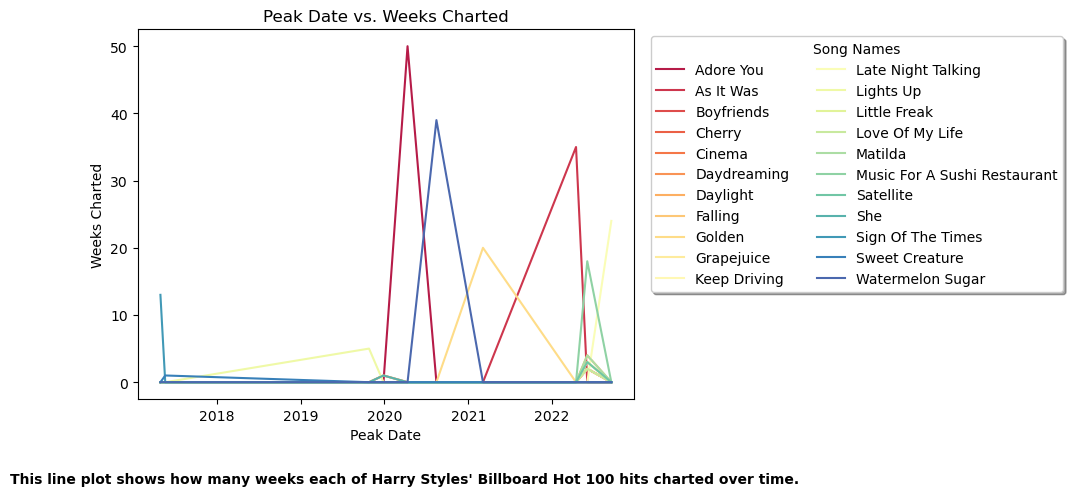

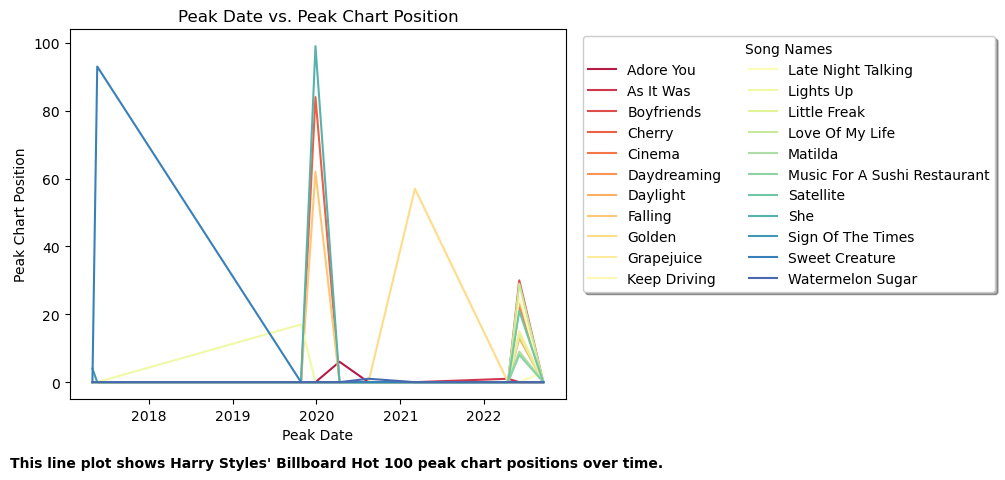

In [94]:
if __name__ == '__main__':
    get_billboard_hot100(name)
    line_plot_weeks_charted(name)
    line_plot_peak_position(name)